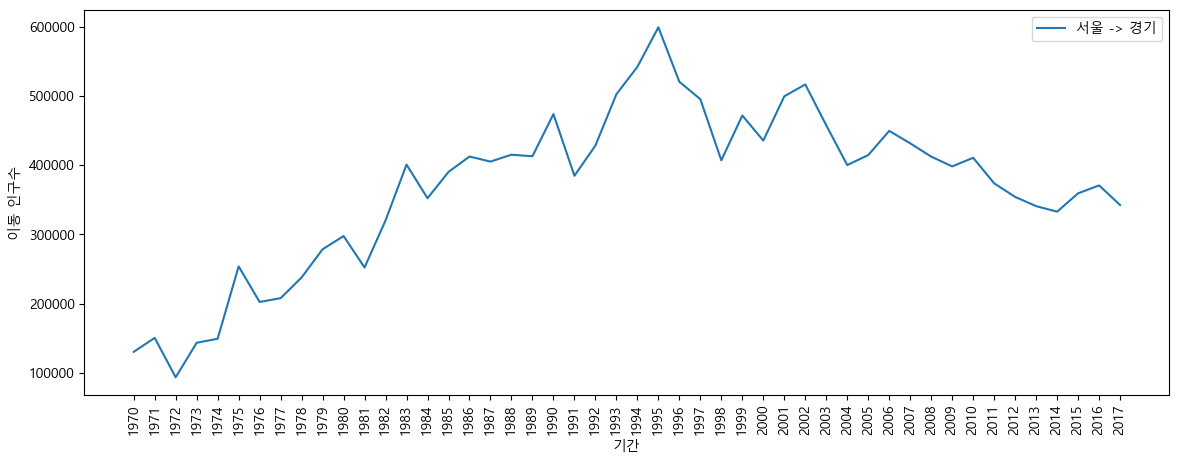

In [46]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

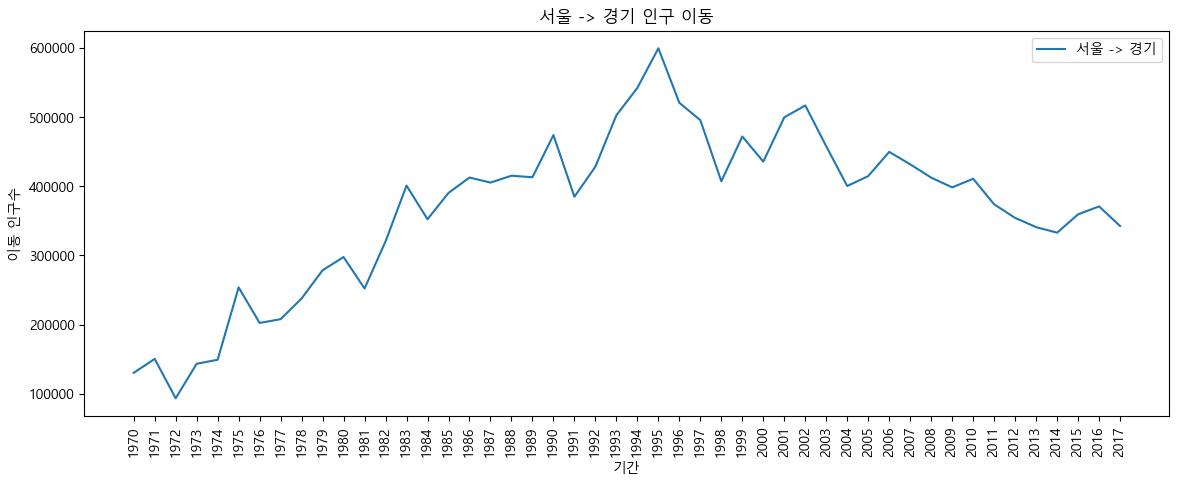

In [ ]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

In [4]:
# 경기 -> 서울
import pandas as pd
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')
# 1. head() 대략적으로 데이터를 확인
# 2. 데이터의 정보확인  info() describe()
# 3. 결측치 여부 확인
# 결측치가 확인되면 drop fillna  선택
df['전출지별'] = df['전출지별'].ffill()  # 결측치 대처, 문자열이고 병합된 컬럼의 정보가 na로 표기되어서 앞의 문자열로 대처
# df.info()
df.isna().sum().values.sum()  # 결측치 확인
pd.to_numeric(df.loc[1:,'1970'],errors='coerce')  # 문자형숫자 ->숫자로 변경하는데. 변경불가능한 데이터는 결측치로 대처

1      4046536.0
2      1742813.0
3       448577.0
4            NaN
5            NaN
         ...    
320        139.0
321        631.0
322        374.0
323        474.0
324       9290.0
Name: 1970, Length: 324, dtype: float64

In [5]:
mask = (df['전출지별'] == '경기도') & (df['전입지별'] == '서울특별시')
df2 = df[mask]
df2

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
164,경기도,서울특별시,95388,95423,90470,107177,107518,207641,144524,154021,...,323515,317952,285963,272407,254175,246464,249701,239557,234357,234448


In [6]:
df2.isna().sum().values.sum()
df3 = df2.iloc[:,2:]
df3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
164,95388,95423,90470,107177,107518,207641,144524,154021,164771,168188,...,323515,317952,285963,272407,254175,246464,249701,239557,234357,234448


Could not save font_manager cache Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\USER\.matplotlib\fontlist-v390.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.


Could not save font_manager cache Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\USER\.matplotlib\fontlist-v390.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.


NameError: name 'sr_one' is not defined

Could not save font_manager cache Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\USER\.matplotlib\fontlist-v390.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.


NameError: name 'sr_one' is not defined

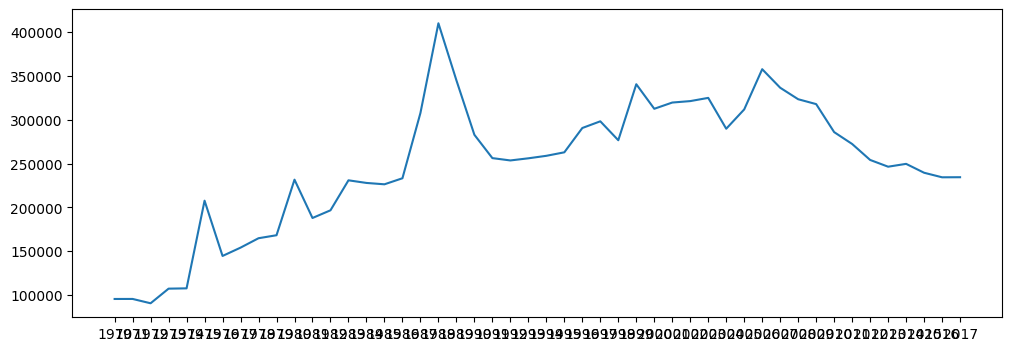

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))


plt.plot(df3.columns,  df3.values.flatten(), label ='경기->서울' )   # 경기 -> 서울
plt.plot(sr_one.index, sr_one.values,label="서울->경기")           # 서울 -> 경기

plt.legend(loc='best')

plt.xticks(rotation=45,fontsize = 7)
plt.show()

In [8]:
# 1991 -  1995
df3.loc[:,'1991':'1995']

sr_one['1991': '1995']

NameError: name 'sr_one' is not defined

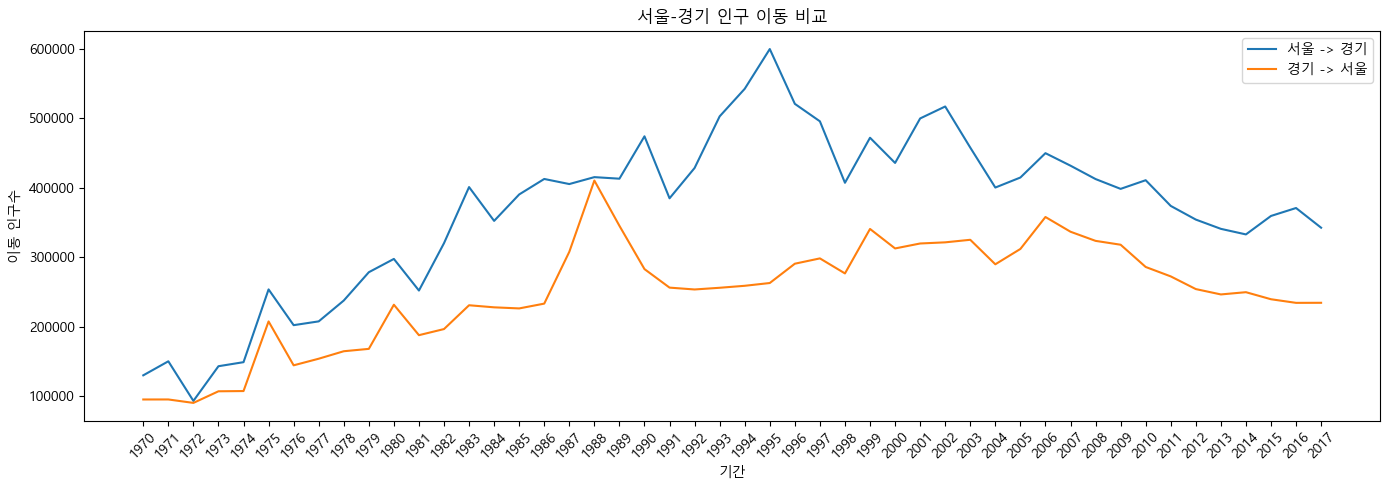

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import re

# ===== 폰트 (경로 확인) =====
font_path = "./data/malgun.ttf"
try:
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
except Exception:
    pass  # 폰트 못 불러와도 그래프는 그리게 함

# ===== 데이터 로드 & 전처리 =====
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx').ffill()

# 연도 컬럼만 추출 (열 이름이 4자리 숫자)
year_cols = [c for c in df.columns if re.fullmatch(r'\d{4}', str(c))]

# 숫자처럼 보이지만 문자열/콤마가 섞였을 수 있으므로 정리
df[year_cols] = (
    df[year_cols]
    .replace(',', '', regex=True)
    .apply(pd.to_numeric, errors='coerce')
)

# ===== 서울->경기 =====
mask_seoul_to_gy = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = (
    df[mask_seoul_to_gy]
    .drop(columns=['전출지별'])
    .rename(columns={'전입지별': '전입지'})
    .set_index('전입지')
)

# 경기도만 선택 (여러 행이 있다면 합산)
row_gy = df_seoul.loc['경기도', year_cols]
if isinstance(row_gy, pd.DataFrame):
    sr_one = row_gy.sum(axis=0)  # 여러 행이면 합계
else:
    sr_one = row_gy.squeeze()    # Series로

# ===== 경기->서울 =====
df2 = df[(df['전출지별'] == '경기도') & (df['전입지별'] == '서울특별시')]

# 혹시 조건에 맞는 행이 여러 개인 경우 안전 처리
if len(df2) == 0:
    raise ValueError("경기->서울 조건에 맞는 행이 없습니다. 엑셀 원본을 확인하세요.")
elif len(df2) > 1:
    sr_two = df2[year_cols].sum(axis=0)   # 여러 행이면 합계
else:
    sr_two = df2.iloc[0][year_cols].squeeze()

# ===== 플로팅 =====
plt.figure(figsize=(14, 5))
plt.plot(sr_one.index, sr_one.values, label='서울 -> 경기')
plt.plot(sr_two.index, sr_two.values, label='경기 -> 서울')
plt.xticks(rotation=45)
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.legend(loc='best')
plt.title('서울-경기 인구 이동 비교')
plt.tight_layout()
plt.show()
